In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("mymoviedb.csv", lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

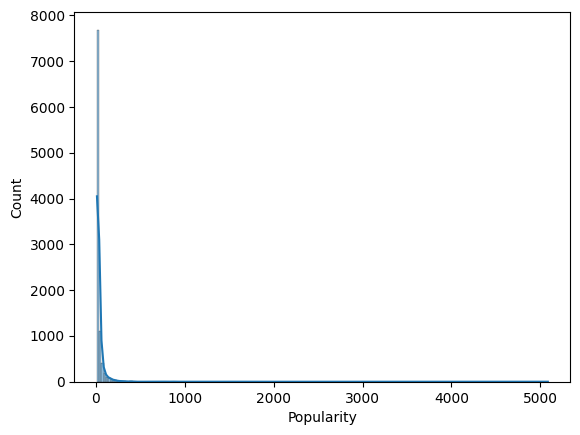

In [13]:
sns.histplot(df['Popularity'], kde=True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [15]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [18]:
df.shape

(9827, 9)

In [19]:
print("Before cleaning:", df['Popularity'].describe())
print("Before cleaning:", df['Vote_Count'].describe())
print("Before cleaning:", df['Vote_Average'].describe())

Before cleaning: count    9827.000000
mean       40.326088
std       108.873998
min        13.354000
25%        16.128500
50%        21.199000
75%        35.191500
max      5083.954000
Name: Popularity, dtype: float64
Before cleaning: count     9827.000000
mean      1392.805536
std       2611.206907
min          0.000000
25%        146.000000
50%        444.000000
75%       1376.000000
max      31077.000000
Name: Vote_Count, dtype: float64
Before cleaning: count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64


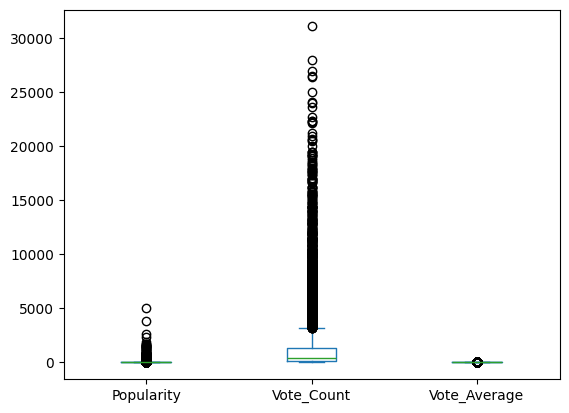

In [20]:
df.plot.box()
plt.show()

In [21]:
q1 =  df['Popularity'].quantile(0.25)
q3 =  df['Popularity'].quantile(0.75)
IQR = q3 - q1
IQR

np.float64(19.062999999999995)

In [22]:
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outliers = df[(df['Popularity']<low) | (df['Popularity']>high)]
print(outliers)

     Release_Date                    Title  \
0      2021-12-15  Spider-Man: No Way Home   
1      2022-03-01               The Batman   
2      2022-02-25                  No Exit   
3      2021-11-24                  Encanto   
4      2021-12-22           The King's Man   
...           ...                      ...   
1042   2021-07-06                  Annette   
1043   2014-06-05           22 Jump Street   
1044   2021-02-26                   Crisis   
1045   2004-10-01                      Saw   
1046   2012-08-17      Secret of the Wings   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     The tale of an extraordinary family, the Madri...    2402.201   
4     As a collection of history's worst tyrants and...    1895.511   
...                  

In [23]:
df["Popularity"] = df["Popularity"].clip(low, high)

In [24]:
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

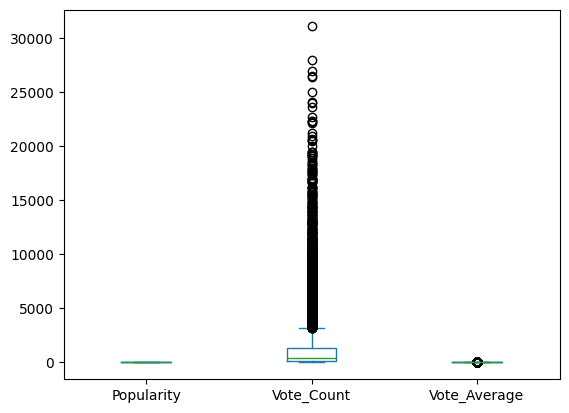

In [25]:
df.plot.box()
plt.show()

In [26]:
q1 =  df['Vote_Count'].quantile(0.25)
q3 =  df['Vote_Count'].quantile(0.75)
IQR = q3 - q1
IQR

np.float64(1230.0)

In [27]:
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outliers = df[(df['Popularity']<low) | (df['Popularity']>high)]
print(outliers)

Empty DataFrame
Columns: [Release_Date, Title, Overview, Popularity, Vote_Count, Vote_Average, Original_Language, Genre, Poster_Url]
Index: []


In [28]:
df['Vote_Count'] = df['Vote_Count'].clip(low,high)

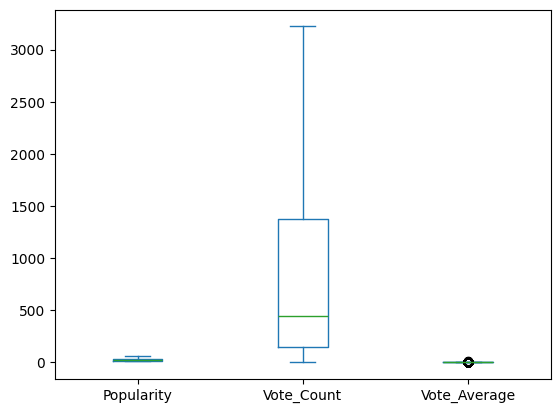

In [29]:
df.plot.box()
plt.show()

In [30]:
q1 =  df['Vote_Average'].quantile(0.25)
q3 =  df['Vote_Average'].quantile(0.75)
IQR = q3 - q1
IQR
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outliers = df[(df['Vote_Average']<low) | (df['Vote_Average']>high)]
print(outliers)

     Release_Date                                 Title  \
77     2022-02-04                Sex, Shame and Tears 2   
80     2022-03-30                  Sonic the Hedgehog 2   
210    2023-04-06                     Fast & Furious 10   
229    2021-12-25                            El Paseo 6   
231    2022-04-22         Dragon Ball Super: Super Hero   
...           ...                                   ...   
9489   2016-11-12                       My Friend's Mom   
9565   2000-06-30  The Adventures of Rocky & Bullwinkle   
9687   2003-12-03                            Sexy Movie   
9713   2022-03-12  Tony Hawk: Until the Wheels Fall Off   
9823   2020-10-01                      Violent Delights   

                                               Overview  Popularity  \
77    Twenty years have passed since those two apart...      63.786   
80    After settling in Green Hills, Sonic is eager ...      63.786   
210             The tenth installment in the Fast Saga.      63.786   
229   T

In [31]:
df['Vote_Average'] = df['Vote_Average'].clip(low,high)

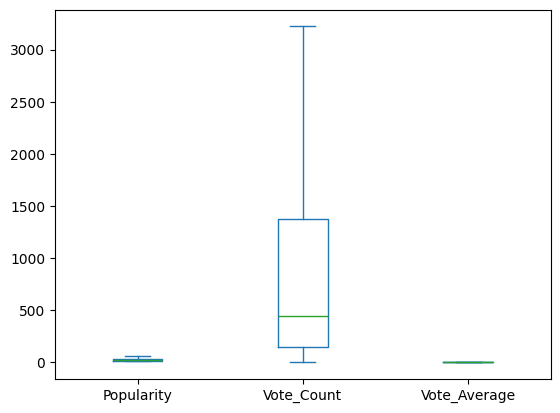

In [32]:
df.plot.box()
plt.show()

In [33]:
print("Before filtering:", df['Popularity'].describe())
print("Before filtering:", df['Vote_Count'].describe())
print("Before filtering:", df['Vote_Average'].describe())

Before filtering: count    9827.000000
mean       28.362255
std        16.344671
min        13.354000
25%        16.128500
50%        21.199000
75%        35.191500
max        63.786000
Name: Popularity, dtype: float64
Before filtering: count    9827.000000
mean      944.255012
std      1070.953996
min         0.000000
25%       146.000000
50%       444.000000
75%      1376.000000
max      3221.000000
Name: Vote_Count, dtype: float64
Before filtering: count    9827.00000
mean        6.48962
std         0.92359
min         4.10000
25%         5.90000
50%         6.50000
75%         7.10000
max         8.90000
Name: Vote_Average, dtype: float64


In [34]:
df.shape

(9827, 9)

In [35]:
df.sample(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
7060,2007-08-24,The Nanny Diaries,A college graduate goes to work as a nanny for...,16.616,846,6.3,en,"Comedy, Drama, Romance",https://image.tmdb.org/t/p/original/8hX6rcxnCi...
6041,2016-05-17,Cyborg X,"After X-Corp, a radical weapons manufacturer, ...",18.445,53,5.8,en,"Action, Horror, Science Fiction",https://image.tmdb.org/t/p/original/83hXrNOZTn...
8383,2000-03-31,Whatever It Takes,"A nerdy teen, Ryan Woodman is smitten with the...",14.779,214,5.9,en,"Drama, Comedy, Romance",https://image.tmdb.org/t/p/original/ao4RoGXC9w...
6553,2015-06-24,One Wild Moment,"Antoine and Laurent, old friends, spend their ...",17.452,886,5.8,fr,"Comedy, Drama, Romance",https://image.tmdb.org/t/p/original/fLwbV87gyp...
8126,2004-11-19,Ring of the Nibelungs,"In this swords-and-sorcery tale, good-hearted ...",15.077,100,6.3,en,Action,https://image.tmdb.org/t/p/original/3Xo2uejRM8...
5704,2015-05-29,Aloha,A celebrated military contractor returns to th...,19.140,1733,5.5,en,"Drama, Comedy, Romance",https://image.tmdb.org/t/p/original/58Y4CjcRX8...
8214,2000-08-29,Alvin and the Chipmunks Meet the Wolfman,It's the Chipmunks' third and final full-lengt...,14.972,146,6.9,en,"Animation, Family, Fantasy, Music, Horror, Comedy",https://image.tmdb.org/t/p/original/xvAGKjbAl2...
9202,1976-01-21,The Smurfs and the Magic Flute,"The evil knight Torchesac, who is at the servi...",13.955,67,6.5,fr,"Animation, Adventure, Family, Comedy, Fantasy",https://image.tmdb.org/t/p/original/raI16q3bC3...
4692,2018-10-25,Replicas,A scientist becomes obsessed with returning hi...,21.969,1059,6.1,en,"Science Fiction, Thriller",https://image.tmdb.org/t/p/original/hhPBTAn9b4...
2258,2007-06-06,Big Stan,Rob Schneider writes and stars in this comedy ...,37.317,600,6.3,en,Comedy,https://image.tmdb.org/t/p/original/zS1uUwKEFc...


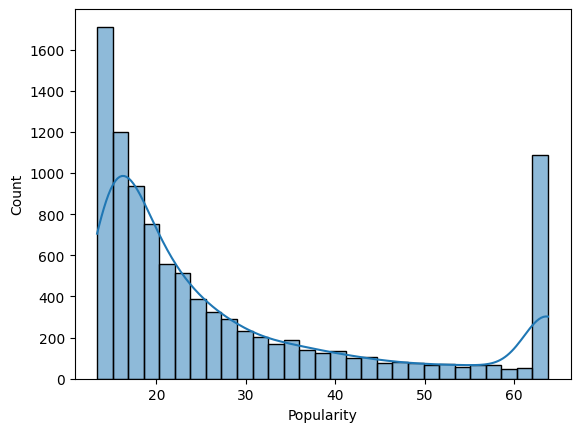

In [36]:
sns.histplot(df['Popularity'], kde=True)
plt.show()

In [37]:
# num_cols = ["Popularity", "Vote_Count", "Vote_Average"]

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# for i, col in enumerate(num_cols):
#     sns.histplot(df[col], kde=True, ax=axes[i])
#     axes[i].set_title(col)

# plt.tight_layout()
# plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [39]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,4.1,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In [40]:
df[np.isclose(df['Vote_Average'], 4.1)].shape[0]

232

In [41]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [42]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [43]:
df['Release_Date'] = df['Release_Date'].dt.year

In [44]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,63.786,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",63.786,3221,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,63.786,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [45]:
df = df.drop(columns=['Poster_Url'], axis=1)


In [46]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,63.786,122,6.3,en,Thriller
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",63.786,3221,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,As a collection of history's worst tyrants and...,63.786,1793,7.0,en,"Action, Adventure, Thriller, War"


In [47]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000,9827.00000
mean,2006.203623,28.362255,944.255012,6.48962
std,15.685554,16.344671,1070.953996,0.92359
min,1902.000000,13.354000,0.000000,4.10000
25%,2000.000000,16.128500,146.000000,5.90000
50%,2011.000000,21.199000,444.000000,6.50000
75%,2017.000000,35.191500,1376.000000,7.10000
max,2024.000000,63.786000,3221.000000,8.90000


In [48]:
def cate_col(df,col,labels):
    edges = [df[col].describe()['min']-0.01,
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], bins=len(labels), labels=labels, duplicates='drop')
    return df

In [49]:
labels = ["least","Very Low", "Low", "Medium", "High"]
df = cate_col(df, 'Vote_Average', labels)

In [50]:
df['Vote_Average'].unique()

['High', 'Low', 'Medium', 'Very Low', 'least']
Categories (5, object): ['least' < 'Very Low' < 'Low' < 'Medium' < 'High']

In [51]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,en,"Crime, Mystery, Thriller"
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,63.786,122,Low,en,Thriller
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",63.786,3221,Medium,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,As a collection of history's worst tyrants and...,63.786,1793,Medium,en,"Action, Adventure, Thriller, War"


In [52]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,Medium,en,"Drama, Crime"
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,least,es,Horror
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,least,en,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Low,en,"Music, Drama, History"
9826,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,Medium,en,"War, Drama, Science Fiction"


In [53]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

In [54]:
df[df['Vote_Average'].isna()]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre


In [55]:
# df['Vote_Average'] = df['Vote_Average'].fillna("bad")

In [56]:
df.tail()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,Medium,en,"Drama, Crime"
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,least,es,Horror
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,least,en,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Low,en,"Music, Drama, History"
9826,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,Medium,en,"War, Drama, Science Fiction"


In [57]:
df.drop(columns=['Original_Language'], inplace=True)

In [58]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,"Action, Adventure, Science Fiction"
1,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,"Crime, Mystery, Thriller"
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,63.786,122,Low,Thriller
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",63.786,3221,Medium,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,As a collection of history's worst tyrants and...,63.786,1793,Medium,"Action, Adventure, Thriller, War"


In [59]:
sns.set_style('whitegrid')

In [60]:
df['Genre'].describe()

count      9827
unique     2337
top       Drama
freq        466
Name: Genre, dtype: object

In [61]:
df['Genre'].value_counts().index

Index(['Drama', 'Comedy', 'Drama, Romance', 'Horror', 'Horror, Thriller',
       'Comedy, Romance', 'Documentary', 'Comedy, Drama', 'Action, Thriller',
       'Comedy, Drama, Romance',
       ...
       'Science Fiction, Animation, Action, Drama',
       'Horror, Thriller, Romance, Mystery',
       'Action, Adventure, Comedy, Drama, Animation',
       'Comedy, Mystery, Action, Adventure', 'Adventure, Thriller, Horror',
       'Drama, Horror, Thriller, Science Fiction',
       'Action, Science Fiction, Animation, Adventure',
       'Comedy, Fantasy, Horror, Science Fiction',
       'Drama, Science Fiction, Animation', 'War, Drama, Science Fiction'],
      dtype='object', name='Genre', length=2337)

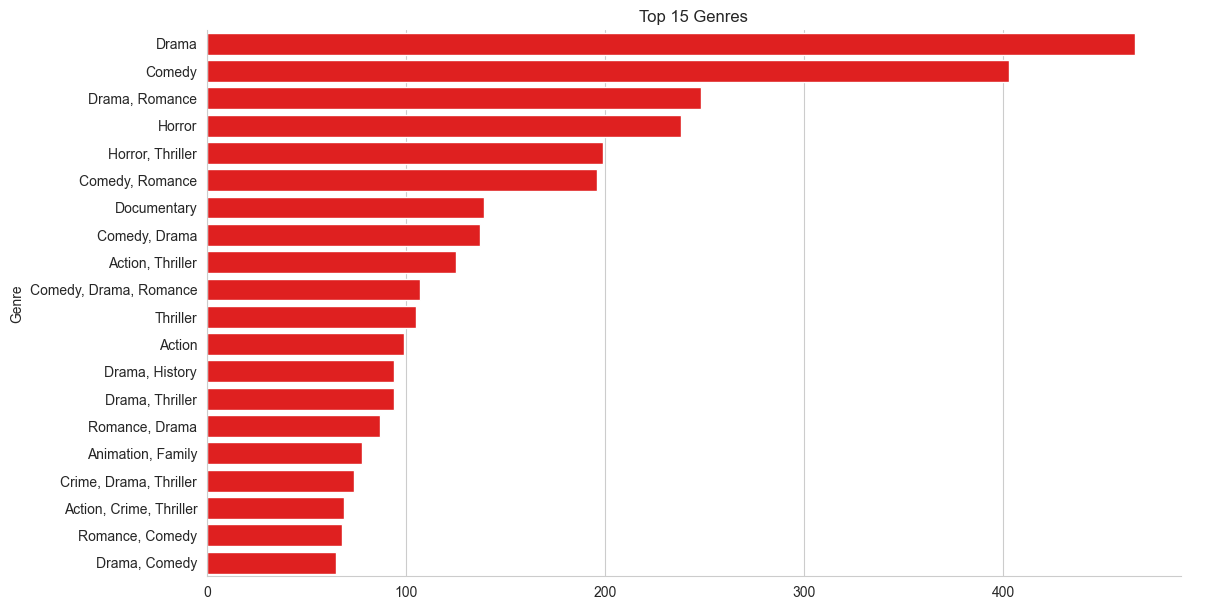

In [62]:
top_genres = df['Genre'].value_counts().head(20)

sns.catplot(
    y=top_genres.index,
    x=top_genres.values,
    kind="bar",
    color="red",
    height=6, aspect=2
)

plt.title("Top 15 Genres")
plt.show()


In [63]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [64]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Mystery


In [65]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

In [66]:
df['Genre'].value_counts().index

Index(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
       'Horror', 'Animation', 'Family', 'Fantasy', 'Science Fiction', 'Crime',
       'Mystery', 'History', 'War', 'Music', 'Documentary', 'TV Movie',
       'Western'],
      dtype='object', name='Genre')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Overview      25793 non-null  object  
 3   Popularity    25793 non-null  float64 
 4   Vote_Count    25793 non-null  int64   
 5   Vote_Average  25793 non-null  category
 6   Genre         25793 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(3)
memory usage: 1.1+ MB


In [68]:
df['Genre'] = df['Genre'].astype('category')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Overview      25793 non-null  object  
 3   Popularity    25793 non-null  float64 
 4   Vote_Count    25793 non-null  int64   
 5   Vote_Average  25793 non-null  category
 6   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 958.2+ KB


In [70]:
df.nunique()

Release_Date     102
Title           9513
Overview        9822
Popularity      7120
Vote_Count      2215
Vote_Average       5
Genre             19
dtype: int64

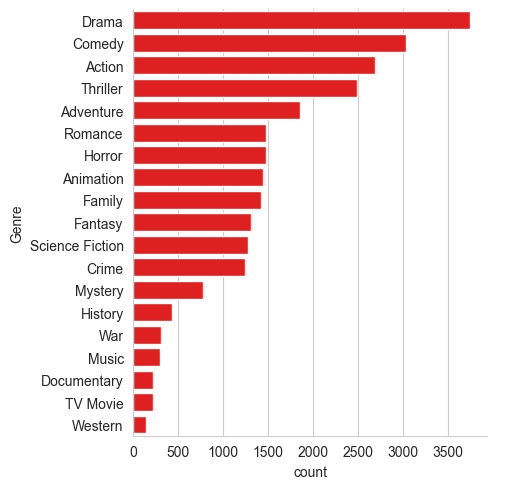

In [71]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='red',)
plt.show()

In [72]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Mystery


In [73]:
df['Vote_Count'].describe()

count    25793.000000
mean       999.418486
std       1094.435999
min          0.000000
25%        166.000000
50%        490.000000
75%       1501.000000
max       3221.000000
Name: Vote_Count, dtype: float64

In [74]:
df['Vote_Count'].value_counts().index

Index([3221,    0,    4,   10,    5,  120,    2,  117,   82,   95,
       ...
       1337, 1166, 2603, 1770, 2036, 2834,  771, 2458, 2964, 2874],
      dtype='int64', name='Vote_Count', length=2215)

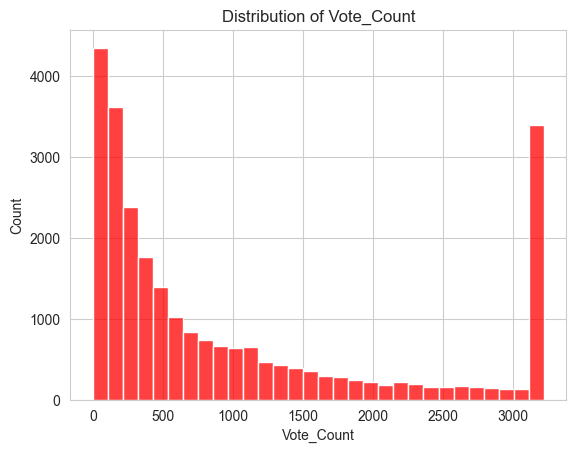

In [75]:
sns.histplot(df['Vote_Count'], kde=False, color='red', bins=30)
plt.title("Distribution of Vote_Count")
plt.show()

Index([3221, 0, 4, 10, 5, 120, 2, 117, 82, 95], dtype='int64', name='Vote_Count')
[3270  241   69   64   62   61   61   60   58   58]


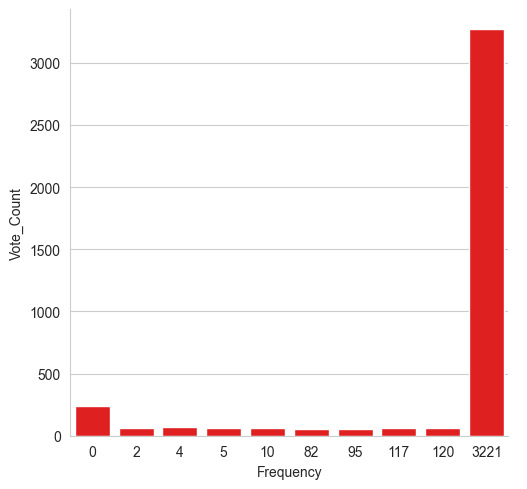

In [97]:
top_counts = df['Vote_Count'].value_counts().head(10)
print(top_counts.index)
print(top_counts.values)
sns.catplot(y=top_counts.values, x = top_counts.index,kind="bar", color='red')
plt.xlabel("Frequency")
plt.ylabel(top_counts.index.name) 
plt.show()

In [77]:
df['Vote_Average'].describe()

count     25793
unique        5
top         Low
freq       9924
Name: Vote_Average, dtype: object

In [78]:
df['Vote_Average'].value_counts()

Vote_Average
Low         9924
Medium      7518
Very Low    5638
least       1602
High        1111
Name: count, dtype: int64

In [79]:
df['Vote_Average'].value_counts().index

CategoricalIndex(['Low', 'Medium', 'Very Low', 'least', 'High'], categories=['least', 'Very Low', 'Low', 'Medium', 'High'], ordered=True, dtype='category', name='Vote_Average')

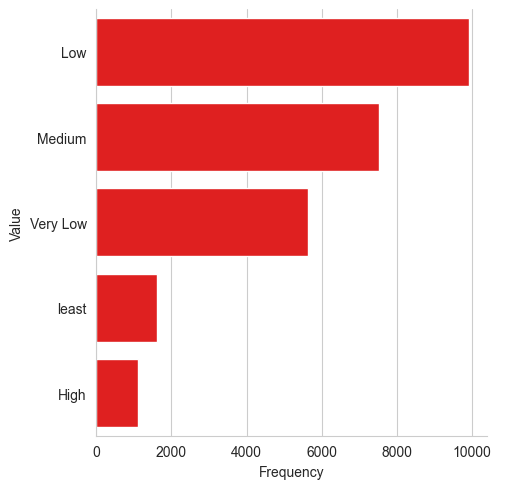

In [80]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='red')
plt.xlabel("Frequency")
plt.ylabel('Value') 
plt.show()

In [81]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,63.786,3221,High,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",63.786,1151,High,Mystery
...,...,...,...,...,...,...,...
2978,2004,Saw,Obsessed with teaching his victims the value o...,63.786,3221,Medium,Crime
2979,2012,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,63.786,928,Medium,Animation
2980,2012,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,63.786,928,Medium,Family
2981,2012,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,63.786,928,Medium,Fantasy


In [82]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Low,Music
25788,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Low,Drama
25789,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,Low,History
25790,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,Medium,War
25791,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,Medium,Drama
25792,1984,Threads,Documentary style account of a nuclear holocau...,13.354,186,Medium,Science Fiction


In [83]:
df[df['Popularity']==df['Popularity'].max()][['Title','Overview','Genre']]

,Title,Overview,Genre
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Action
1,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Adventure
2,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Science Fiction
3,The Batman,"In his second year of fighting crime, Batman u...",Crime
4,The Batman,"In his second year of fighting crime, Batman u...",Mystery
...,...,...,...
2978,Saw,Obsessed with teaching his victims the value o...,Crime
2979,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,Animation
2980,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,Family
2981,Secret of the Wings,Tinkerbell wanders into the forbidden Winter w...,Fantasy


In [85]:
df['Release_Date'].unique()

array([2021, 2022, 2020, 1986, 2018, 1989, 2012, 2009, 2005, 2019, 2014,
       2016, 2001, 2015, 2002, 2017, 2011, 2007, 2004, 2010, 1972, 2023,
       2008, 1995, 1994, 1992, 2013, 2003, 2006, 1999, 1993, 1985, 1998,
       1950, 1997, 2000, 1991, 1937, 1990, 1977, 1940, 1981, 1942, 1973,
       1941, 1974, 1951, 1996, 1959, 1961, 1967, 1953, 1988, 1956, 1983,
       1976, 1955, 1970, 1984, 1971, 1987, 1963, 1980, 1939, 1975, 1979,
       1982, 1966, 1978, 1965, 1946, 1964, 1968, 1962, 1960, 1957, 1949,
       1922, 2024, 1969, 1954, 1933, 1932, 1958, 1952, 1944, 1931, 1948,
       1938, 1945, 1927, 1925, 1935, 1936, 1902, 1920, 1947, 1943, 1929,
       1926, 1921, 1930], dtype=int32)

In [86]:
df['Release_Date'].value_counts()

Release_Date
2021    1638
2018    1387
2017    1365
2019    1272
2016    1212
        ... 
2024       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 102, dtype: int64

<Axes: >

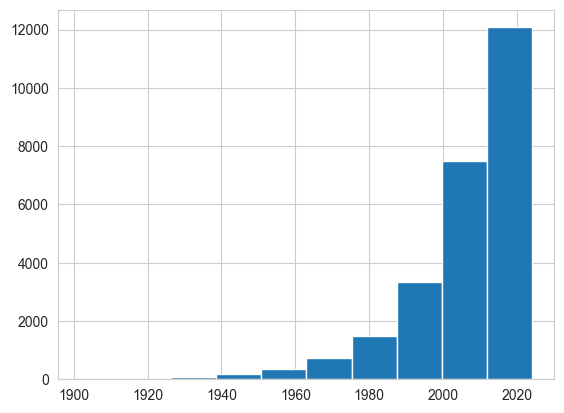

In [87]:
df['Release_Date'].hist()

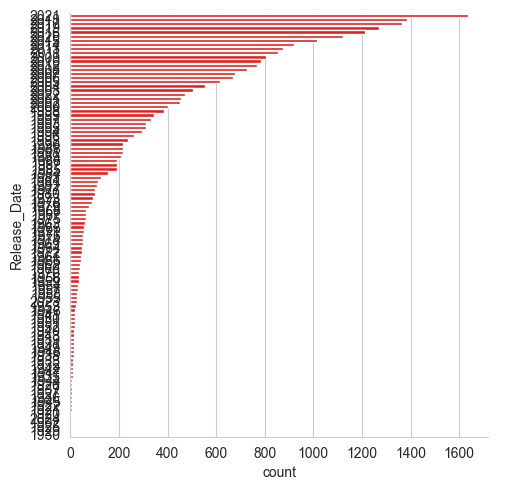

In [89]:
sns.catplot(y='Release_Date', data = df, kind='count', order=df['Release_Date'].value_counts().index, color='red')
plt.show()

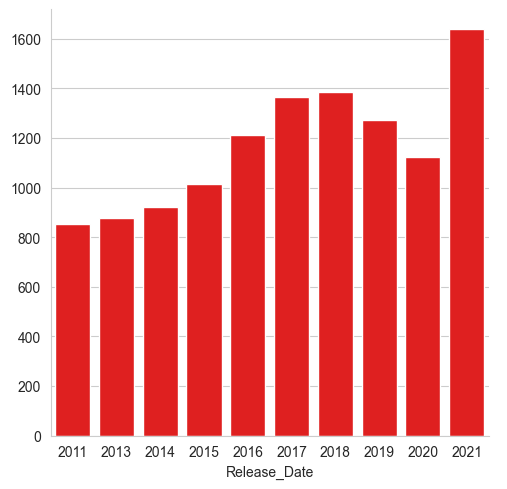

In [96]:
val = df['Release_Date'].value_counts().head(10)
sns.catplot(y=val.values, x = val.index, kind='bar', color='red')
plt.show()